# Swish-based classifier using cosine-annealed LR with restarts and data augmentation
- Swish activation, 4 layers, 100 neurons per layer
- LR using cosine-annealing with restarts and cycle multiplicity of 2
- Data is augmentaed via phi rotations, and transvers and longitudinal flips
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from __future__ import division
import sys
import os
sys.path.append('../')
from modules.basics import *
from modules.class_basics import *

Using TensorFlow backend.


## Options

In [2]:
with open(DATA_PATH/'feats.pkl', 'rb') as fin:
    train_feats = pickle.load(fin)

In [3]:
n_models = 10
patience = 2
max_epochs = 200

ensemble_size = 10
ensemble_mode = 'loss'

compile_args = {'loss':'binary_crossentropy', 'optimizer':'adam'}
train_params = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
model_params = {'version':'modelSwish', 'n_in':len(train_feats), 'compile_args':compile_args, 'mode':'classifier'}

print ("\nTraining on", len(train_feats), "features:", [var for var in train_feats])


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [4]:
with open(DATA_PATH/'input_pipe.pkl', 'rb') as fin:
    input_pipe = pickle.load(fin)

In [5]:
train_fy = HEPAugFoldYielder(train_feats, h5py.File(DATA_PATH/'train.hdf5', "r+"), rotate=False,
                             input_pipe=None, rot_mult=8)

Augmenting via y flips
Augmenting via longitunidnal flips
Total augmentation multiplicity is 4


/Users/giles/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


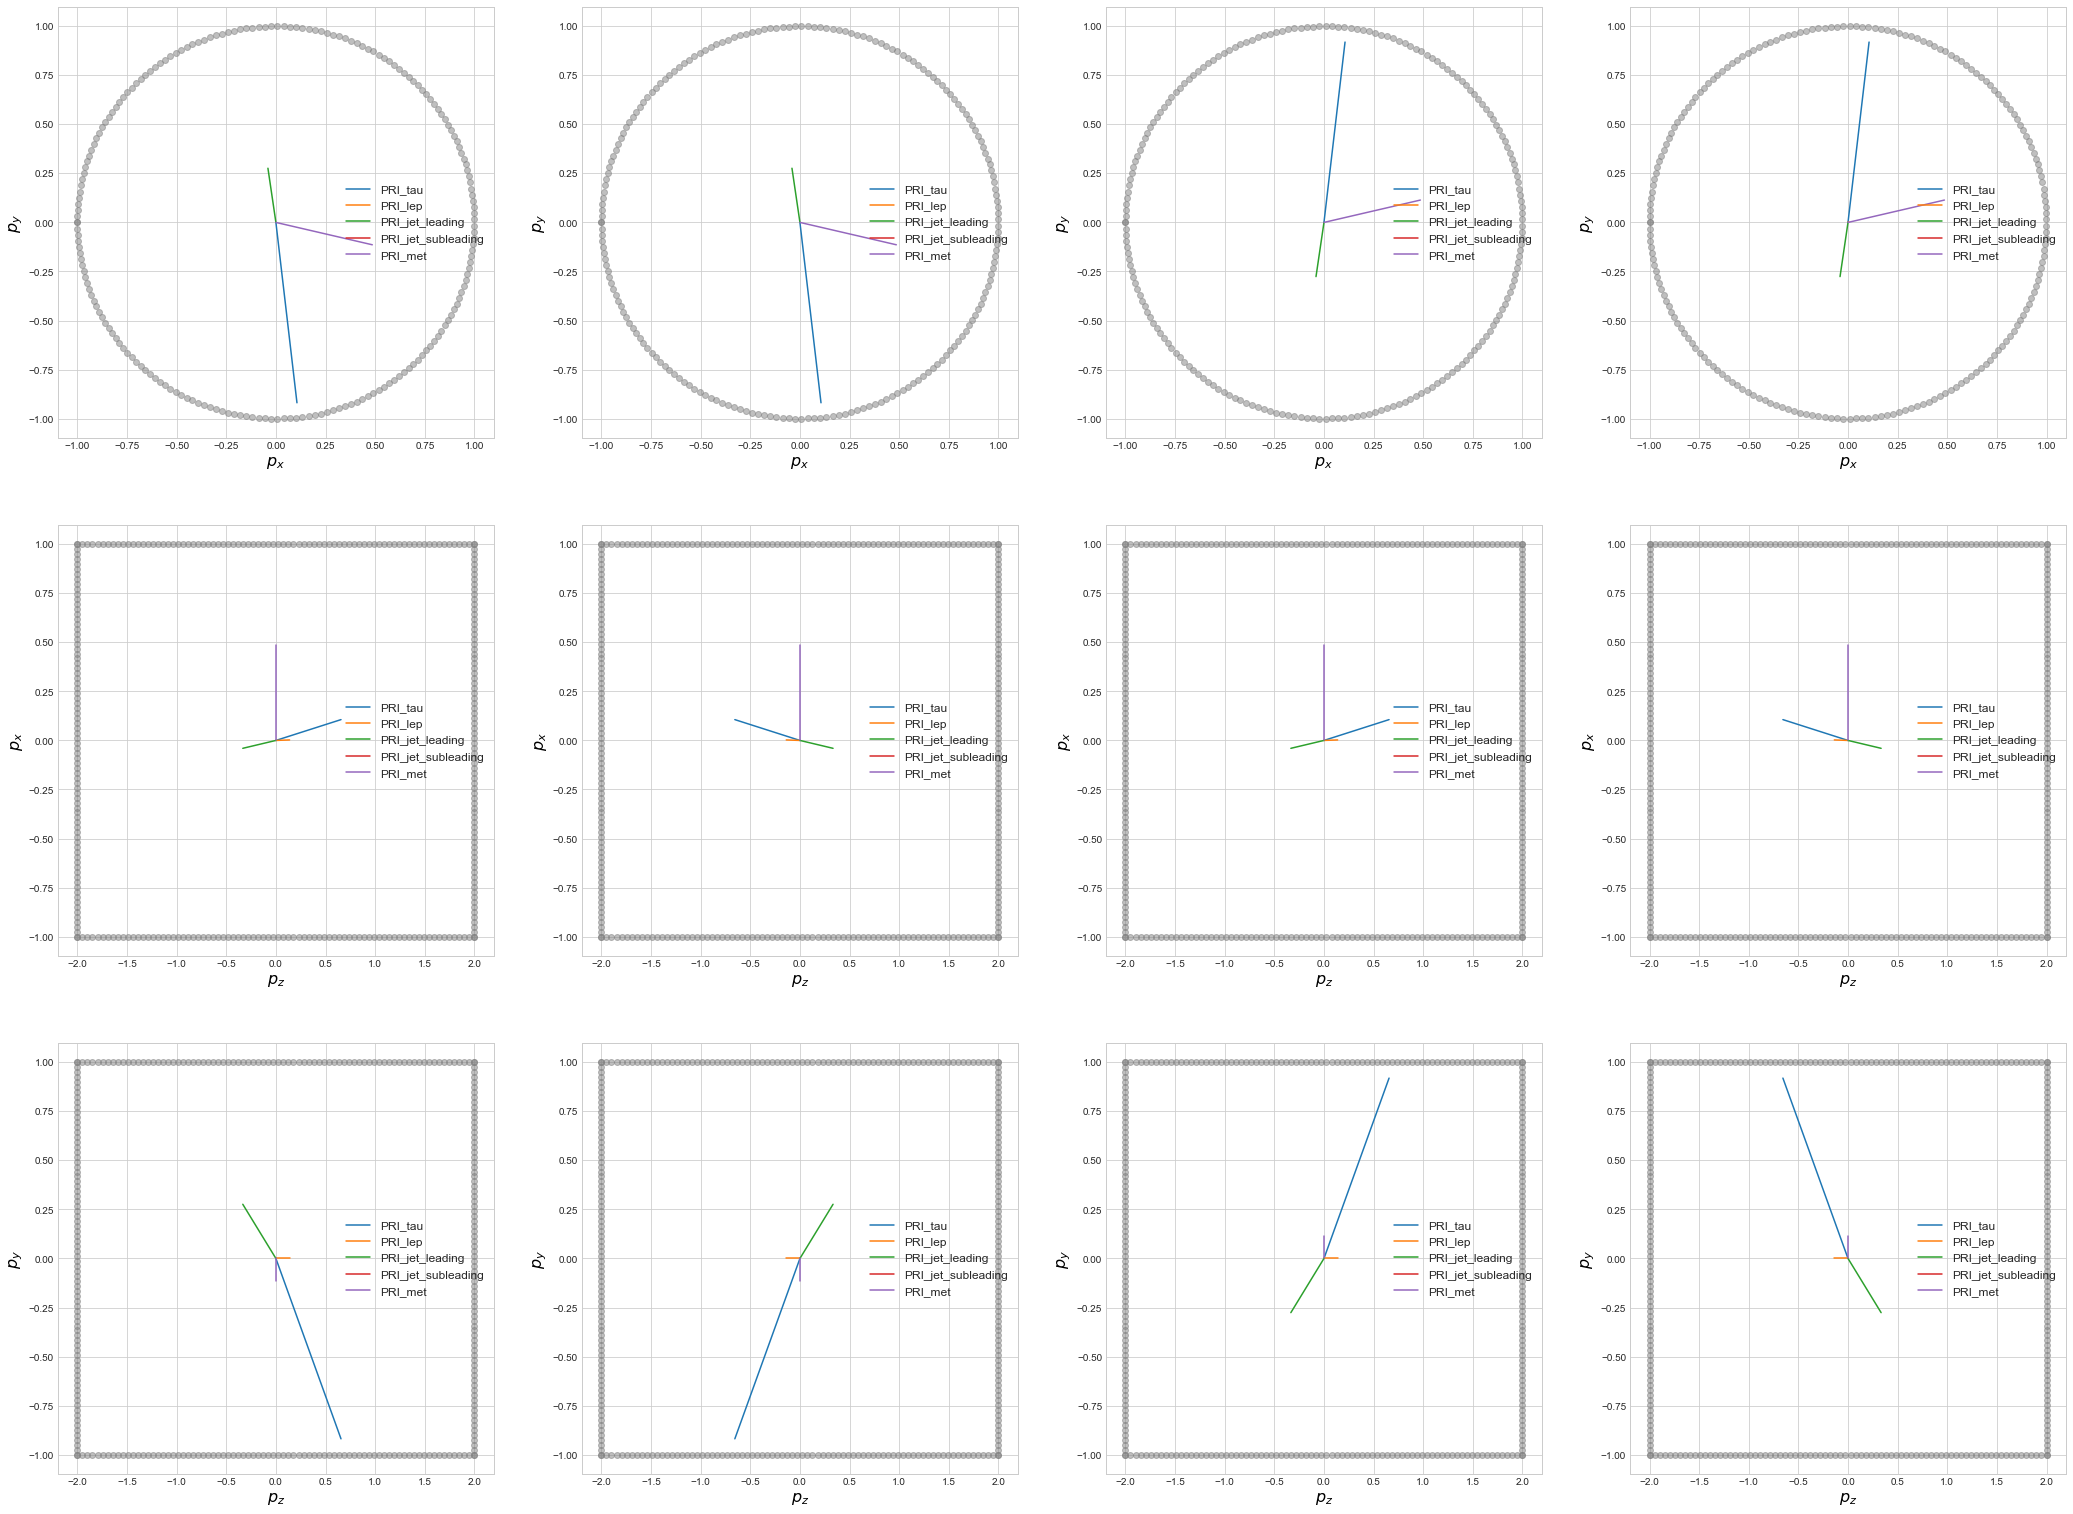

In [6]:
id=3
aug_ranges = [range(4)]
for aug_range in aug_ranges:
    comp_events([pd.DataFrame(train_fy.get_test_fold(0, i)['inputs'], columns=train_feats)[id:id+1] for i in aug_range])

## Determine LR

2 classes found, running in binary mode



/Users/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 11.053s 


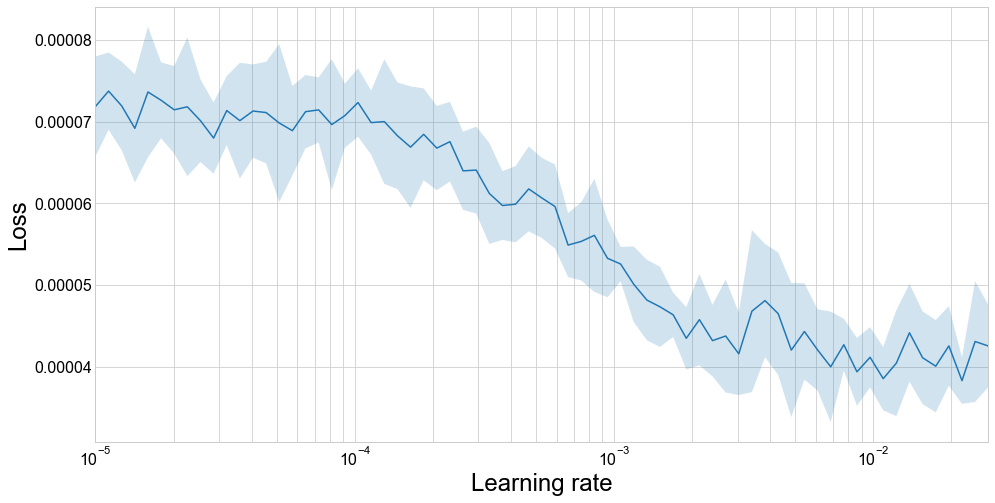

______________________________________



In [7]:
lr_finder = fold_lr_find(train_fy, get_model, model_params, train_params,
                         lr_bounds=[1e-5,1e-1], train_on_weights=True, verbose=0)

## Train classifier

In [8]:
model_gen_params = {**model_params, 'compile_args':{**compile_args, 'lr':2e-3}}
use_callbacks = {'CosAnnealLR':{'cycle_mult':2, 'reverse':False, 'redux_decay':True}}
ams_args = {'n_total':250000, 'br':10, 'delta_b':0}
plots = ['history', 'lr']

Training using weights
Training model 1 / 10
Using cosine LR annealing
2 classes found, running in binary mode

1 New best found: 3.709749614499742e-05
2 New best found: 3.59794452553615e-05
3 New best found: 3.4974577849789056e-05
5 New best found: 3.402446126419818e-05
6 New best found: 3.383718760451302e-05
7 New best found: 3.359911915831617e-05
9 New best found: 3.3572243777598486e-05
10 New best found: 3.346966420649551e-05
11 New best found: 3.3322079079516695e-05
12 New best found: 3.3096856904012384e-05
13 New best found: 3.266390367061831e-05
14 New best found: 3.260969485272653e-05
15 New best found: 3.2602332904934885e-05
23 New best found: 3.253146830975311e-05
24 New best found: 3.247155593635398e-05
25 New best found: 3.2274982442322654e-05
28 New best found: 3.224168438609922e-05
29 New best found: 3.21586264828511e-05
30 New best found: 3.213809977751225e-05
31 New best found: 3.2135811052285136e-05
48 New best found: 3.2110742881923216e-05
50 New best found: 3.1986760

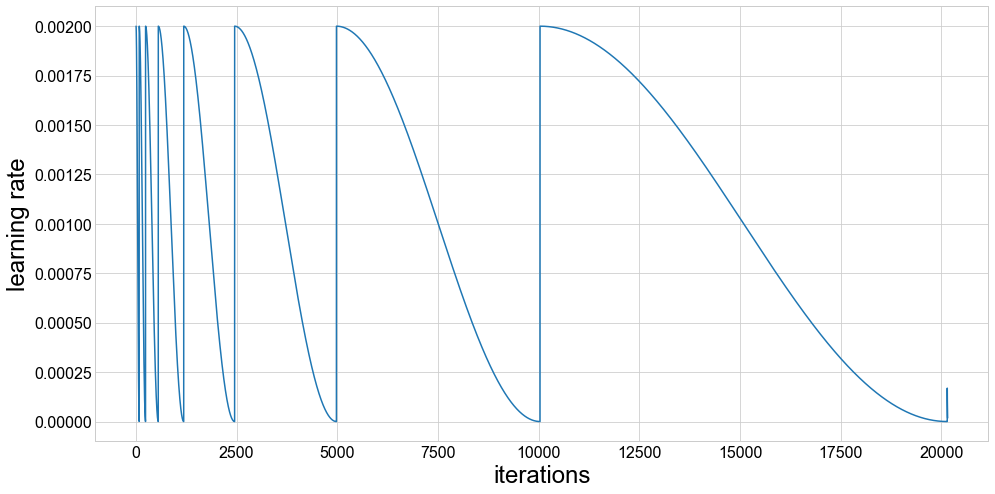

Fold took 132.635s

Training model 2 / 10
Using cosine LR annealing
1 New best found: 3.733068897720856e-05
2 New best found: 3.5073274547684806e-05
3 New best found: 3.4476083471084015e-05
4 New best found: 3.416025900250957e-05
6 New best found: 3.3527360742254346e-05
7 New best found: 3.3260216553610144e-05
11 New best found: 3.286184715830408e-05
12 New best found: 3.2742530163552036e-05
13 New best found: 3.2720016551259466e-05
14 New best found: 3.259095355771919e-05
24 New best found: 3.256634577336863e-05
25 New best found: 3.2449947942999826e-05
26 New best found: 3.230049830151372e-05
28 New best found: 3.222411458631006e-05
29 New best found: 3.217786393486464e-05
30 New best found: 3.2155885480914896e-05
31 New best found: 3.215173838562842e-05
49 New best found: 3.1974988004872525e-05
54 New best found: 3.1918158220019e-05
56 New best found: 3.183222582512975e-05
58 New best found: 3.18165309121329e-05
59 New best found: 3.181567784648622e-05
61 New best found: 3.180476144

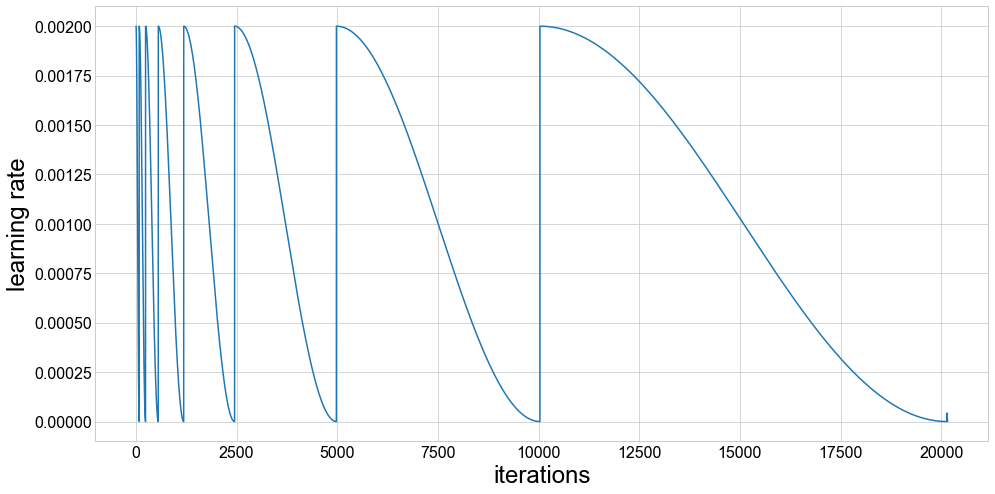

Fold took 137.987s

Training model 3 / 10
Using cosine LR annealing
1 New best found: 3.687949769648839e-05
2 New best found: 3.557629292462224e-05
3 New best found: 3.4636279599915864e-05
5 New best found: 3.414115865493508e-05
6 New best found: 3.345570692175788e-05
7 New best found: 3.3320586854492417e-05
10 New best found: 3.31098937929355e-05
11 New best found: 3.2814496868962445e-05
12 New best found: 3.267195028253071e-05
13 New best found: 3.265078668007894e-05
14 New best found: 3.250310536542602e-05
15 New best found: 3.248116528770504e-05
24 New best found: 3.237530434196636e-05
25 New best found: 3.220651554321784e-05
26 New best found: 3.2125834152711966e-05
28 New best found: 3.203741179462632e-05
29 New best found: 3.200479996047312e-05
30 New best found: 3.1995942794180515e-05
31 New best found: 3.199559967960728e-05
50 New best found: 3.19777844462728e-05
52 New best found: 3.190656255021742e-05
55 New best found: 3.189346252879206e-05
56 New best found: 3.183123164132

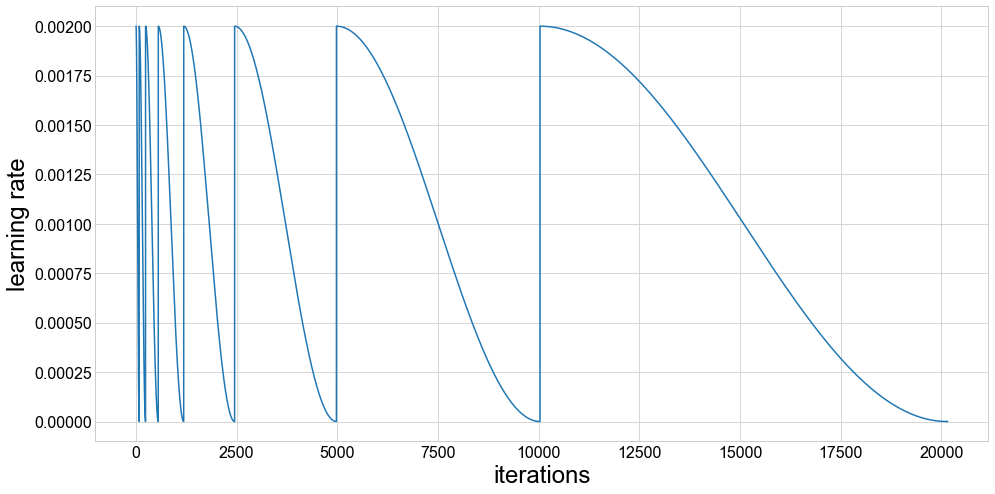

Fold took 141.775s

Training model 4 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101555). Check your callbacks.
  % delta_t_median)


1 New best found: 3.7801524157504956e-05
2 New best found: 3.536633413606913e-05
3 New best found: 3.467712834272649e-05
4 New best found: 3.4396719554883566e-05
5 New best found: 3.37448470709327e-05
6 New best found: 3.319659213470665e-05
7 New best found: 3.311537630919201e-05
11 New best found: 3.2626603913996484e-05
12 New best found: 3.26115485020283e-05
13 New best found: 3.230676025166065e-05
14 New best found: 3.222498927123485e-05
15 New best found: 3.221098284801958e-05
22 New best found: 3.218945554141739e-05
23 New best found: 3.207019968842985e-05
25 New best found: 3.2062882599155374e-05
26 New best found: 3.190548590133683e-05
28 New best found: 3.179913303808787e-05
29 New best found: 3.176678261502901e-05
30 New best found: 3.1748805702544e-05
31 New best found: 3.1742434177091505e-05
48 New best found: 3.168223686498882e-05
49 New best found: 3.159077265200443e-05
50 New best found: 3.1453447921388794e-05
56 New best found: 3.142853656966498e-05
58 New best found: 3.

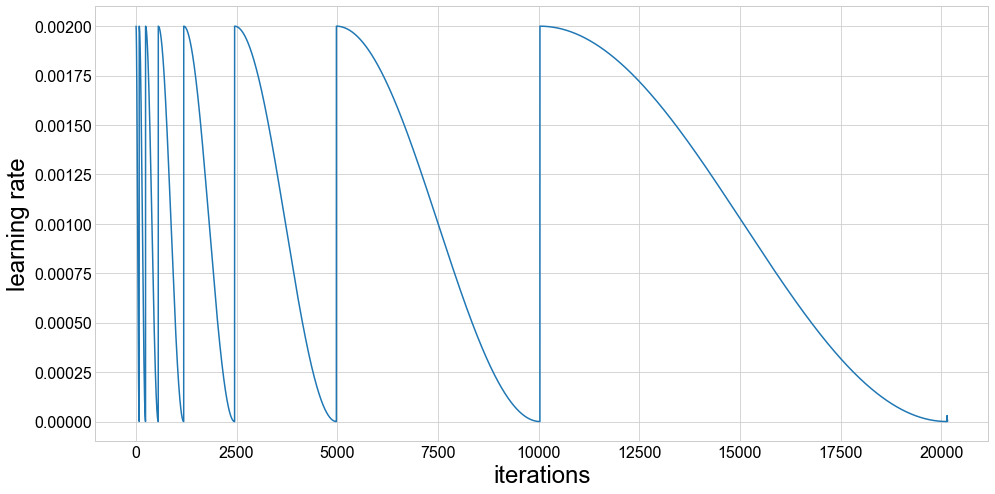

Fold took 146.560s

Training model 5 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112514). Check your callbacks.
  % delta_t_median)


1 New best found: 3.823231093781792e-05
2 New best found: 3.6114310112684596e-05
3 New best found: 3.523183326495461e-05
4 New best found: 3.486810341464011e-05
5 New best found: 3.410047794004605e-05
6 New best found: 3.361357236273471e-05
7 New best found: 3.3449091271050245e-05
11 New best found: 3.3351830430394066e-05
12 New best found: 3.268561964069449e-05
14 New best found: 3.260478776440922e-05
15 New best found: 3.253907917378871e-05
25 New best found: 3.249798036070907e-05
26 New best found: 3.2273869258527925e-05
27 New best found: 3.2206637188752184e-05
28 New best found: 3.218529193196798e-05
29 New best found: 3.217134972405334e-05
30 New best found: 3.215887636645215e-05
31 New best found: 3.2152600382415414e-05
49 New best found: 3.2113577785040246e-05
51 New best found: 3.2011479031124645e-05
53 New best found: 3.1944760257040384e-05
56 New best found: 3.1939905511694625e-05
57 New best found: 3.1904373327531607e-05
58 New best found: 3.1888712494211075e-05
59 New best

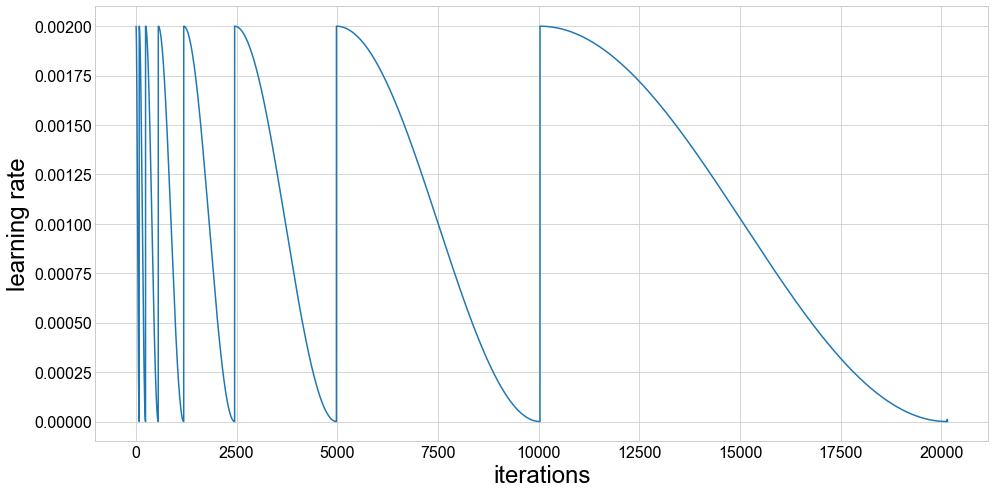

Fold took 144.483s

Training model 6 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114710). Check your callbacks.
  % delta_t_median)


1 New best found: 3.756737818330293e-05
2 New best found: 3.5485511938168205e-05
3 New best found: 3.4863599750678985e-05
5 New best found: 3.4296549523423895e-05
6 New best found: 3.395938279136317e-05
7 New best found: 3.373684646794573e-05
11 New best found: 3.324464919569436e-05
12 New best found: 3.320324593951227e-05
13 New best found: 3.300720332626952e-05
14 New best found: 3.295809042610927e-05
23 New best found: 3.2897658897854857e-05
24 New best found: 3.270165228896076e-05
25 New best found: 3.254755502130138e-05
27 New best found: 3.248602797248168e-05
28 New best found: 3.248524170630844e-05
29 New best found: 3.244365071732318e-05
30 New best found: 3.239499649353092e-05
31 New best found: 3.239204876881558e-05
48 New best found: 3.22582676759339e-05
52 New best found: 3.224302989983698e-05
55 New best found: 3.213052583596436e-05
57 New best found: 3.210875754593872e-05
101 New best found: 3.210564716573572e-05
102 New best found: 3.2067399224615656e-05
103 New best fou

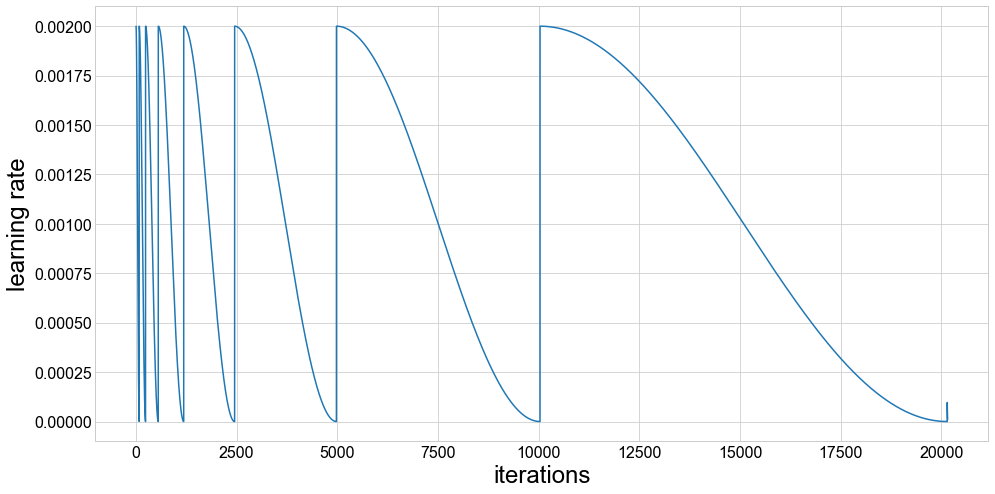

Fold took 148.639s

Training model 7 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120890). Check your callbacks.
  % delta_t_median)


1 New best found: 3.7443594489013776e-05
2 New best found: 3.518336296547204e-05
3 New best found: 3.456214801699389e-05
4 New best found: 3.40484508764348e-05
6 New best found: 3.3334360836306584e-05
7 New best found: 3.325869732943829e-05
10 New best found: 3.3089436966110954e-05
11 New best found: 3.29740731351194e-05
12 New best found: 3.267860648047644e-05
13 New best found: 3.258590816112701e-05
15 New best found: 3.250875630910741e-05
21 New best found: 3.247318973735673e-05
23 New best found: 3.2168503497086933e-05
28 New best found: 3.2095008878968656e-05
29 New best found: 3.20140493218787e-05
30 New best found: 3.19862646079855e-05
31 New best found: 3.198575475398684e-05
46 New best found: 3.1924777744279706e-05
49 New best found: 3.1872862151067236e-05
53 New best found: 3.1827021787466944e-05
55 New best found: 3.170198875013739e-05
57 New best found: 3.167977638513548e-05
58 New best found: 3.1673453352414074e-05
61 New best found: 3.1666503577434924e-05
62 New best foun

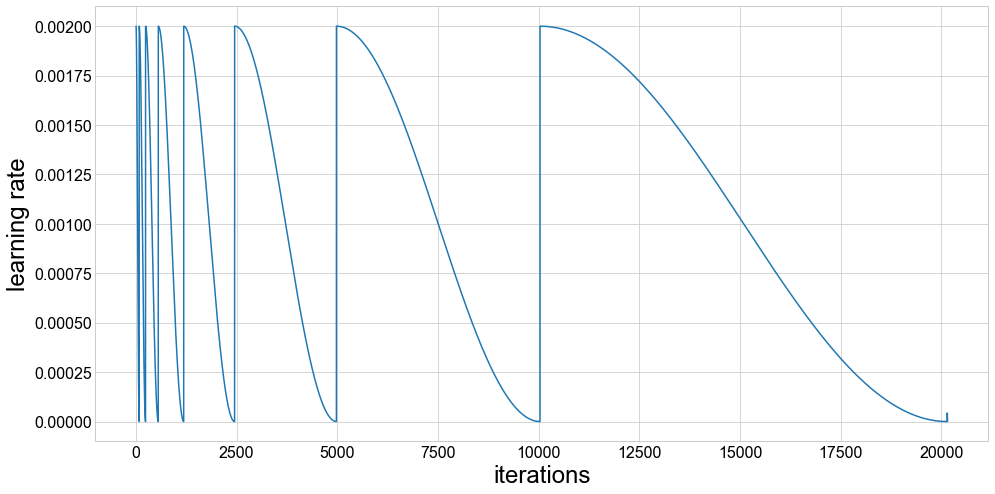

Fold took 145.724s

Training model 8 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.260654). Check your callbacks.
  % delta_t_median)
/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130590). Check your callbacks.
  % delta_t_median)


1 New best found: 3.7736714140373416e-05
2 New best found: 3.540579170229045e-05
3 New best found: 3.4260160670556924e-05
4 New best found: 3.4230439238761705e-05
5 New best found: 3.3487538110673004e-05
6 New best found: 3.3175145018990475e-05
7 New best found: 3.299035149898725e-05
10 New best found: 3.2879388709361595e-05
11 New best found: 3.263082553476576e-05
12 New best found: 3.226398960272157e-05
13 New best found: 3.2137033533038075e-05
14 New best found: 3.205572052427002e-05
15 New best found: 3.2049309531361904e-05
22 New best found: 3.2009984039707735e-05
25 New best found: 3.1829846376704226e-05
26 New best found: 3.178359651883261e-05
27 New best found: 3.1662082785814285e-05
28 New best found: 3.162292498799291e-05
30 New best found: 3.160607903398187e-05
31 New best found: 3.160149212017319e-05
48 New best found: 3.1430079919497685e-05
53 New best found: 3.138803357505316e-05
56 New best found: 3.137574958861946e-05
57 New best found: 3.133805108962246e-05
59 New best

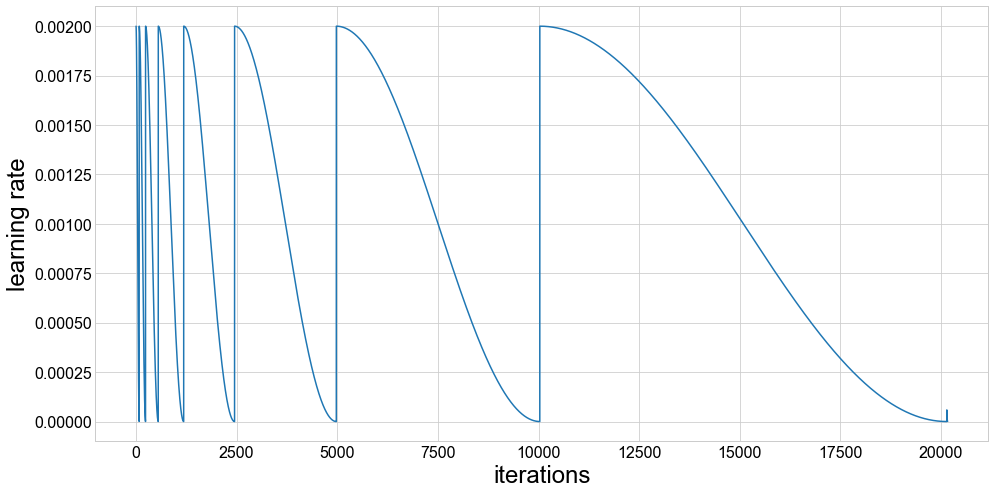

Fold took 160.532s

Training model 9 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.271740). Check your callbacks.
  % delta_t_median)
/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136126). Check your callbacks.
  % delta_t_median)


1 New best found: 3.847335461177863e-05
2 New best found: 3.621488073840737e-05
3 New best found: 3.5197001160122456e-05
4 New best found: 3.5165287482959685e-05
5 New best found: 3.427250492532039e-05
6 New best found: 3.393250795925269e-05
7 New best found: 3.377253172366181e-05
11 New best found: 3.356738742586458e-05
12 New best found: 3.3357427442388145e-05
13 New best found: 3.3252897825150285e-05
14 New best found: 3.3170675742439925e-05
15 New best found: 3.313118926598691e-05
22 New best found: 3.306942967901705e-05
23 New best found: 3.292729630775284e-05
25 New best found: 3.2875848666299134e-05
26 New best found: 3.2745537253504155e-05
29 New best found: 3.271810225996887e-05
48 New best found: 3.27044476827723e-05
50 New best found: 3.269184222881449e-05
52 New best found: 3.255723807087634e-05
56 New best found: 3.253021153068403e-05
57 New best found: 3.2526895926275754e-05
58 New best found: 3.243841547955526e-05
61 New best found: 3.242312929796753e-05
97 New best foun

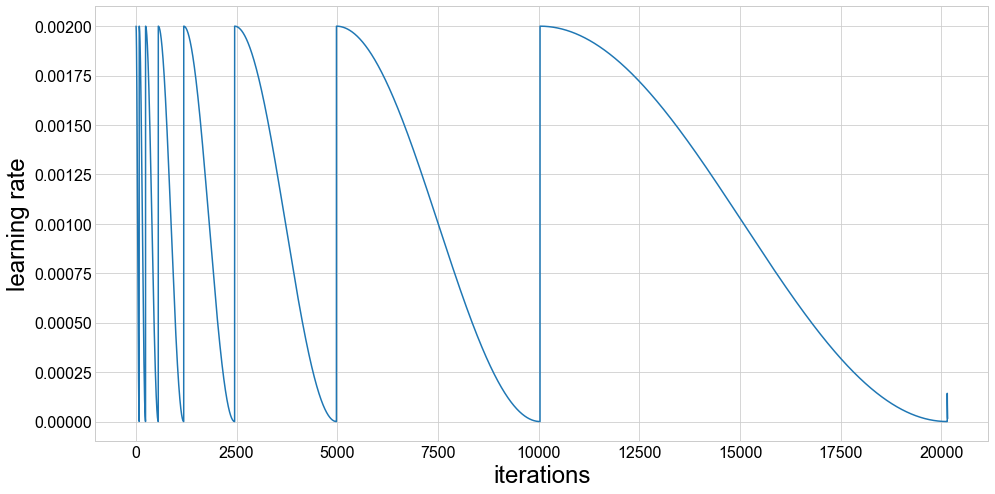

Fold took 157.166s

Training model 10 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.294059). Check your callbacks.
  % delta_t_median)
/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147350). Check your callbacks.
  % delta_t_median)


1 New best found: 3.751083487699748e-05
2 New best found: 3.5483583293151876e-05
3 New best found: 3.482746342247087e-05
5 New best found: 3.435649671102404e-05
6 New best found: 3.352688896483142e-05
7 New best found: 3.349169748549597e-05
11 New best found: 3.328666352646918e-05
12 New best found: 3.294763420349616e-05
13 New best found: 3.28264255693006e-05
14 New best found: 3.2681040584787715e-05
15 New best found: 3.261280536486479e-05
24 New best found: 3.258136803847232e-05
25 New best found: 3.240643768735699e-05
26 New best found: 3.223183334232342e-05
28 New best found: 3.220970297411681e-05
29 New best found: 3.2147318017179636e-05
30 New best found: 3.2139196366728696e-05
31 New best found: 3.213880810721017e-05
50 New best found: 3.213504452273301e-05
51 New best found: 3.208449883570478e-05
55 New best found: 3.1957482230277194e-05
61 New best found: 3.1941495778936884e-05
62 New best found: 3.193627076920809e-05
63 New best found: 3.1936156820494464e-05
100 New best fou

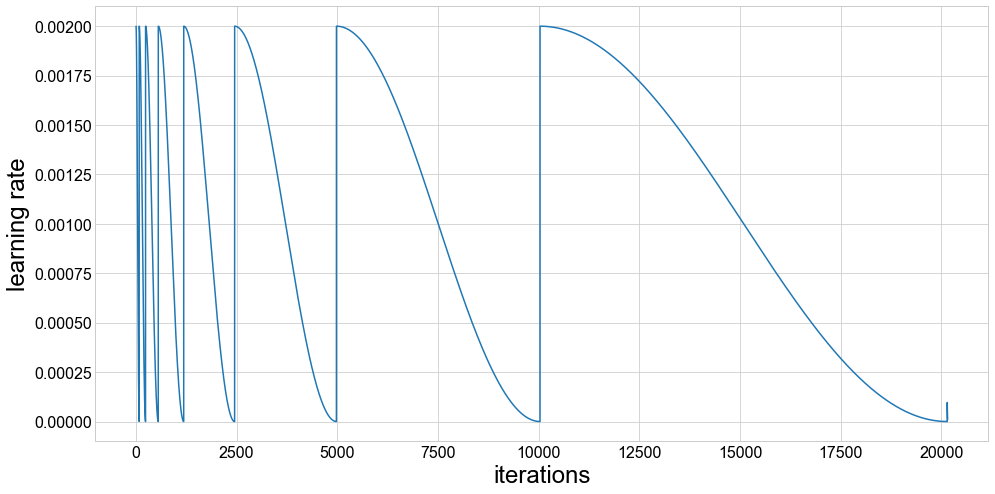

Fold took 158.135s


______________________________________
Training finished
Cross-validation took 1477.111s 


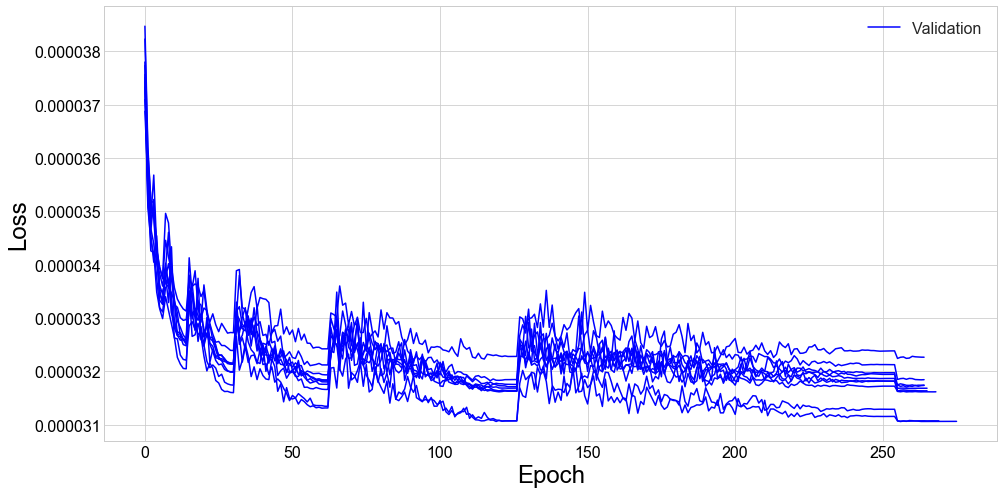

Mean loss = 3.16e-05 +- 1e-07
Mean wAUC = 0.0628 +- 0.0004
Mean AUC = 0.0978 +- 0.0004
Mean AMS = 3.89 +- 0.05
Mean cut = 0.963 +- 0.004
______________________________________



<Figure size 432x288 with 0 Axes>

In [9]:
results, histories = fold_train_model(train_fy, n_models,
                                      model_gen_params=model_gen_params,
                                      train_params=train_params, train_on_weights=True,
                                      use_callbacks=use_callbacks, ams_args=ams_args,
                                      max_epochs=max_epochs, patience=patience,
                                      verbose=1, plots=plots)

## Construct ensemble

In [10]:
with open('train_weights/resultsFile.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [11]:
ensemble, weights = assemble_ensemble(results, ensemble_size, ensemble_mode, compile_args)

Choosing ensemble by loss
Model 0 is 7 with loss = 3.106052790893049e-05
Model 1 is 3 with loss = 3.106724267624643e-05
Model 2 is 1 with loss = 3.161607940196187e-05
Model 3 is 2 with loss = 3.162814370542806e-05
Model 4 is 6 with loss = 3.16285782137129e-05
Model 5 is 4 with loss = 3.168310554433674e-05
Model 6 is 0 with loss = 3.169540792005137e-05
Model 7 is 9 with loss = 3.1733907061797745e-05
Model 8 is 5 with loss = 3.1824750141822735e-05
Model 9 is 8 with loss = 3.223230555158807e-05


## Response on validation data without TTA

In [12]:
val_fy = FoldYielder(h5py.File(DATA_PATH/'val.hdf5', "r+"))

In [13]:
fold_ensemble_predict(ensemble, weights, val_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.001192239329199947s per sample

Predicting fold 2 out of 10
Prediction took 0.0002319650148000619s per sample

Predicting fold 3 out of 10
Prediction took 0.00019825194919994828s per sample

Predicting fold 4 out of 10
Prediction took 0.00019332513079998534s per sample

Predicting fold 5 out of 10
Prediction took 0.0001929978926000331s per sample

Predicting fold 6 out of 10
Prediction took 0.00020009410920001754s per sample

Predicting fold 7 out of 10
Prediction took 0.00019441310419997536s per sample

Predicting fold 8 out of 10
Prediction took 0.00020357904020002024s per sample

Predicting fold 9 out of 10
Prediction took 0.00019778068840005288s per sample

Predicting fold 10 out of 10
Prediction took 0.00020194151579999015s per sample



In [14]:
val_df = convert_to_df(val_fy.source)

50000 candidates loaded


In [15]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(val_df.gen_target, val_df.pred_class),
                                                           roc_auc_score(val_df.gen_target, val_df.pred_class, sample_weight=val_df.gen_weight)))

Testing ROC AUC: unweighted 0.9039064835889031, weighted 0.9363301590297508


/Users/giles/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/giles/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Best cut at 0.9654980832869345 corresponds to AMS of 3.95633747873795
Maximum AMS for data is 4.00978594861817 at cut of 0.9657407402992249
CPU times: user 13.1 s, sys: 32.4 ms, total: 13.2 s
Wall time: 13.2 s


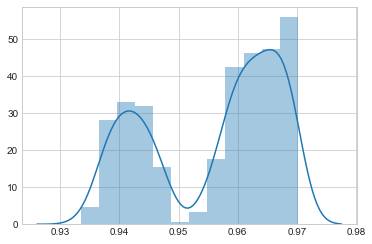

In [16]:
%%time
cut_kde = kde_optimise_cut(val_df, top_perc=0.05, br=10, w_factor=250000/50000)

Mean cut at 0.9560172 corresponds to AMS of 3.7417767170098015
Maximum AMS for data is 4.00978594861817 at cut of 0.9657407402992249
CPU times: user 68.9 ms, sys: 8.66 ms, total: 77.5 ms
Wall time: 53.7 ms


/Users/giles/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/giles/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


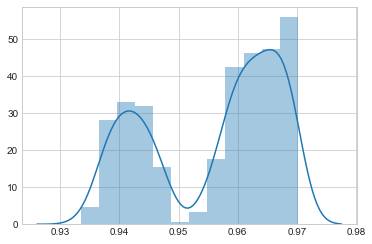

In [17]:
%%time
cut_mean = mean_optimise_cut(val_df, top_perc=0.05, br=10, w_factor=250000/50000)

## Response on validation data with TTA

In [18]:
val_fy = HEPAugFoldYielder(train_feats, h5py.File(DATA_PATH/'val.hdf5', "r+"), rotate=False,
                             input_pipe=None, rot_mult=8)

Augmenting via y flips
Augmenting via longitunidnal flips
Total augmentation multiplicity is 4


In [19]:
fold_ensemble_predict(ensemble, weights, val_fy, pred_name='pred_TTA', ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.000815299299399976s per sample

Predicting fold 2 out of 10
Prediction took 0.0008070572288000221s per sample

Predicting fold 3 out of 10
Prediction took 0.0008164372555999762s per sample

Predicting fold 4 out of 10
Prediction took 0.0008661817899999733s per sample

Predicting fold 5 out of 10
Prediction took 0.0008381792711999878s per sample

Predicting fold 6 out of 10
Prediction took 0.0008257923036000648s per sample

Predicting fold 7 out of 10
Prediction took 0.0007931544942000073s per sample

Predicting fold 8 out of 10
Prediction took 0.0008009519157999421s per sample

Predicting fold 9 out of 10
Prediction took 0.000817824806200042s per sample

Predicting fold 10 out of 10
Prediction took 0.0008254648167999221s per sample



In [20]:
val_df_tta = convert_to_df(val_fy.source, pred_name='pred_TTA')

50000 candidates loaded


In [21]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(val_df_tta.gen_target, val_df_tta.pred_class),
                                                           roc_auc_score(val_df_tta.gen_target, val_df_tta.pred_class, sample_weight=val_df_tta.gen_weight)))

Testing ROC AUC: unweighted 0.9039993262810092, weighted 0.9363824614861859


/Users/giles/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/giles/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Best cut at 0.965862623385123 corresponds to AMS of 3.956043003117361
Maximum AMS for data is 3.9886512242041676 at cut of 0.9630527496337891
CPU times: user 13.6 s, sys: 60.7 ms, total: 13.6 s
Wall time: 13.7 s


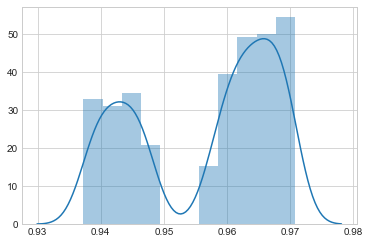

In [22]:
%%time
cut_kde_tta = kde_optimise_cut(val_df_tta, top_perc=0.05, br=10, w_factor=250000/50000)

Mean cut at 0.9566514 corresponds to AMS of 3.7678858364816277
Maximum AMS for data is 3.9886512242041676 at cut of 0.9630527496337891
CPU times: user 93.8 ms, sys: 11.8 ms, total: 106 ms
Wall time: 52.3 ms


/Users/giles/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/giles/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


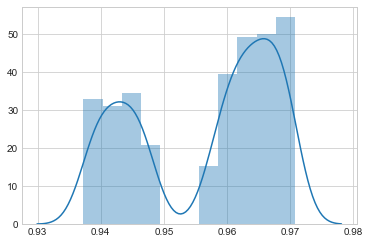

In [23]:
%%time
cut_mean_tta = mean_optimise_cut(val_df_tta, top_perc=0.05, br=10, w_factor=250000/50000)

# Test scoring - Without TTA

In [24]:
test_fy = FoldYielder(h5py.File(DATA_PATH/'testing.hdf5', "r+"))

In [25]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.0002005690047454581s per sample

Predicting fold 2 out of 10
Prediction took 0.00019738405349091243s per sample

Predicting fold 3 out of 10
Prediction took 0.0002007079583272736s per sample

Predicting fold 4 out of 10
Prediction took 0.000200145434090907s per sample

Predicting fold 5 out of 10
Prediction took 0.0002000893968545411s per sample

Predicting fold 6 out of 10
Prediction took 0.00020999542410909272s per sample

Predicting fold 7 out of 10
Prediction took 0.0002071798139636402s per sample

Predicting fold 8 out of 10
Prediction took 0.0001947899782727208s per sample

Predicting fold 9 out of 10
Prediction took 0.00019367204278182313s per sample

Predicting fold 10 out of 10
Prediction took 0.00019691713905454393s per sample

CPU times: user 2min 5s, sys: 13.6 s, total: 2min 18s
Wall time: 1min 50s


In [26]:
score_test_data(test_fy.source, cut_kde)

Public:Private AMS: 3.5921748097345163 : 3.716185964717488


(3.5921748097345163, 3.716185964717488)

In [27]:
score_test_data(test_fy.source, cut_mean)

Public:Private AMS: 3.7475419671691825 : 3.769363553156079


(3.7475419671691825, 3.769363553156079)

# Test scoring - With TTA

In [28]:
test_fy = HEPAugFoldYielder(train_feats, h5py.File(DATA_PATH/'testing.hdf5', "r+"), rotate=False,
                             input_pipe=None, rot_mult=8)

Augmenting via y flips
Augmenting via longitunidnal flips
Total augmentation multiplicity is 4


In [29]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, pred_name='pred_TTA', ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.0008023578176727328s per sample

Predicting fold 2 out of 10
Prediction took 0.0008017155710727242s per sample

Predicting fold 3 out of 10
Prediction took 0.0008089579428727202s per sample

Predicting fold 4 out of 10
Prediction took 0.0007975261836545459s per sample

Predicting fold 5 out of 10
Prediction took 0.000805093103218182s per sample

Predicting fold 6 out of 10
Prediction took 0.0007814981719818124s per sample

Predicting fold 7 out of 10
Prediction took 0.0007904789000545447s per sample

Predicting fold 8 out of 10
Prediction took 0.0007975761746363622s per sample

Predicting fold 9 out of 10
Prediction took 0.0008110622505272741s per sample

Predicting fold 10 out of 10
Prediction took 0.0007889915934181855s per sample

CPU times: user 8min 18s, sys: 54 s, total: 9min 12s
Wall time: 7min 19s


In [30]:
score_test_data(test_fy.source, cut_kde_tta, pred_name='pred_TTA')

Public:Private AMS: 3.611664020045836 : 3.708048099681434


(3.611664020045836, 3.708048099681434)

In [31]:
score_test_data(test_fy.source, cut_mean_tta, pred_name='pred_TTA')

Public:Private AMS: 3.7782711779326394 : 3.7773217480726013


(3.7782711779326394, 3.7773217480726013)

# Save/Load

In [ ]:
name = "weights/Swish_CLR_TTA"

In [ ]:
saveEnsemble(name, ensemble, weights, compile_args, overwrite=1)

In [ ]:
ensemble, weights, compile_args, _, _ = loadEnsemble(name)